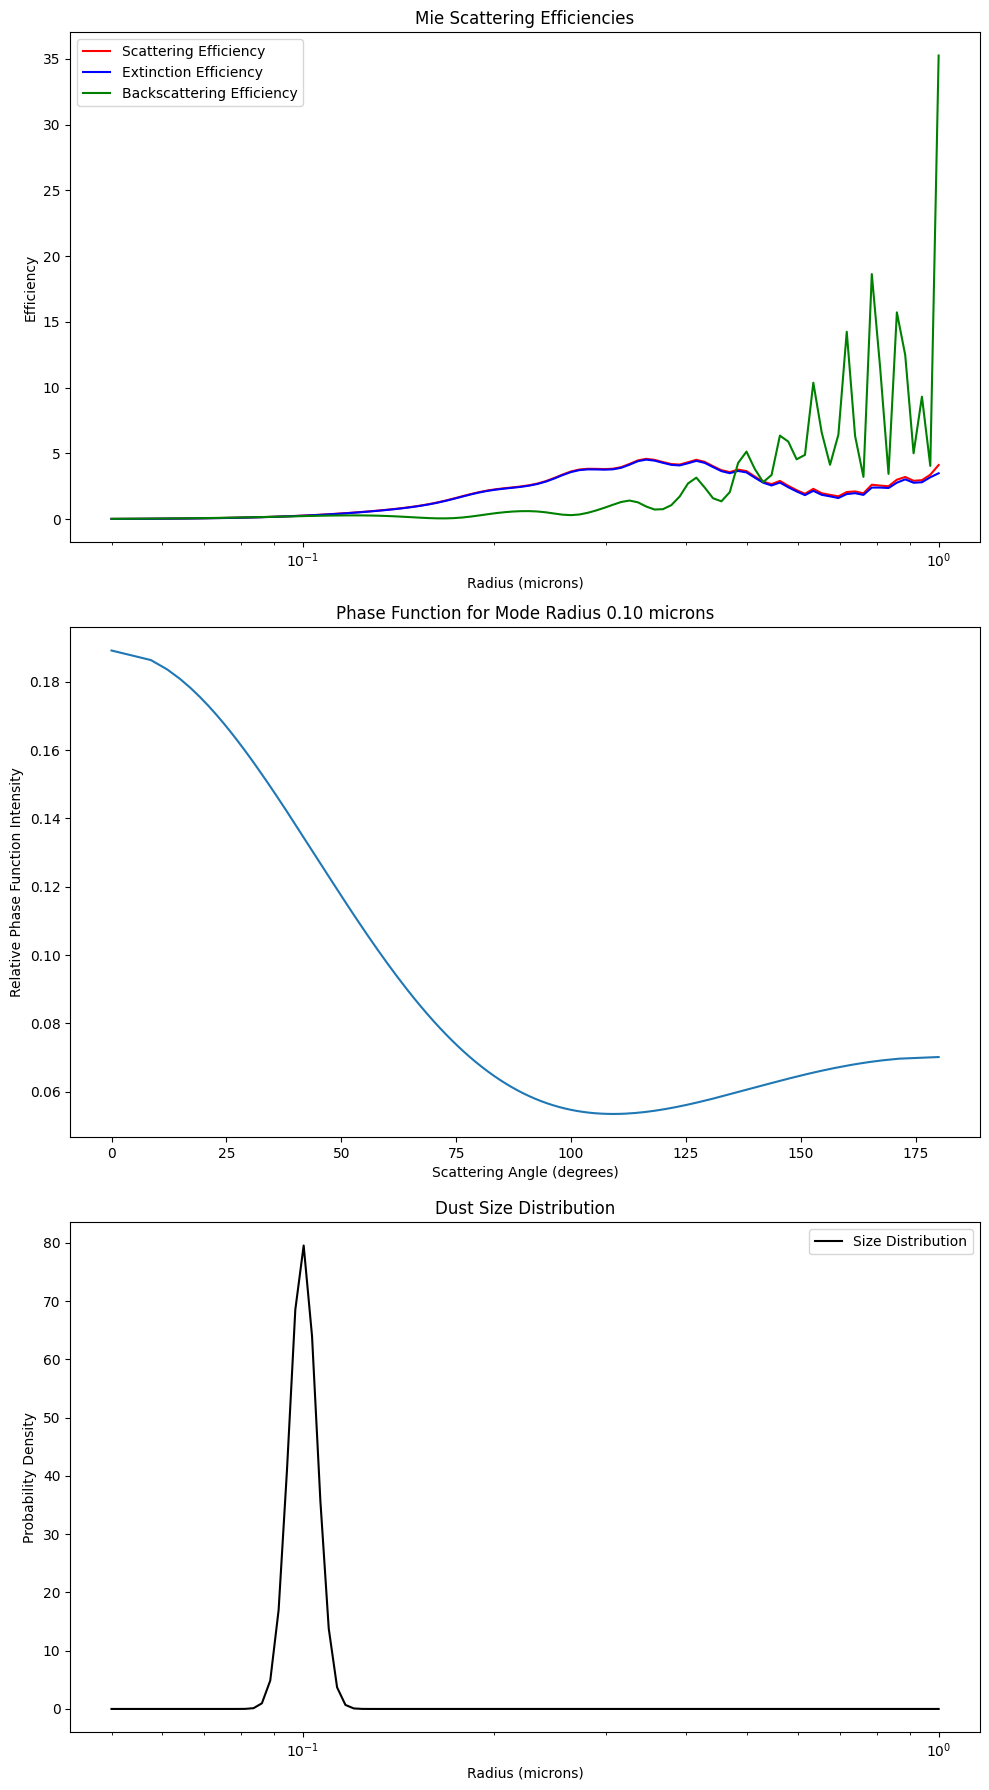

X-values: [0.05       0.05153612 0.05311943 0.05475139 0.05643349 0.05816726
 0.0599543  0.06179624 0.06369477 0.06565162 0.0676686  0.06974754
 0.07189035 0.074099   0.0763755  0.07872194 0.08114046 0.08363329
 0.08620271 0.08885106 0.09158078 0.09439436 0.09729439 0.1002835
 0.10336445 0.10654006 0.10981323 0.11318695 0.11666433 0.12024854
 0.12394286 0.12775068 0.13167549 0.13572088 0.13989055 0.14418833
 0.14861814 0.15318405 0.15789023 0.162741   0.16774079 0.17289419
 0.17820592 0.18368083 0.18932395 0.19514044 0.20113562 0.20731499
 0.21368421 0.2202491  0.22701568 0.23399015 0.24117889 0.24858849
 0.25622572 0.2640976  0.27221131 0.2805743  0.28919421 0.29807895
 0.30723666 0.31667571 0.32640475 0.33643269 0.34676871 0.35742228
 0.36840315 0.37972138 0.39138734 0.4034117  0.41580547 0.42858002
 0.44174703 0.45531856 0.46930704 0.48372528 0.49858649 0.51390427
 0.52969264 0.54596607 0.56273947 0.58002818 0.59784804 0.61621537
 0.63514699 0.65466023 0.67477297 0.69550362 0.716871

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import miepython

# Updated parameters for lunar dust with size distribution
m_particle = 1.56 + 0.003j  # Complex refractive index of lunar dust
wavelength = 0.628  # Wavelength of light in micrometers (for a visible range)
mode_radius = 0.1  # Mode radius of the lunar dust particle in micrometers
std_dev = 0.05  # Assumed standard deviation in micrometers for log-normal distribution

# Calculate the shape and scale parameters for the log-normal distribution
shape = std_dev
mu = np.log(mode_radius) + shape**2
scale = np.exp(mu)

# Generate size distribution
num_sizes = 100
radii = np.logspace(np.log10(0.05), np.log10(1.0), num_sizes)
pdf = lognorm.pdf(radii, shape, scale=scale)

# Mie scattering calculations for each size
qext, qsca, qback, g = np.zeros(num_sizes), np.zeros(num_sizes), np.zeros(num_sizes), np.zeros(num_sizes)
for i, radius in enumerate(radii):
    x = 2 * np.pi * radius / wavelength
    qext[i], qsca[i], qback[i], g[i] = miepython.mie(m_particle, x)

# Calculate the phase function for a typical size (mode size)
x_mode = 2 * np.pi * mode_radius / wavelength
num_angles = 180
angles_cosine = np.linspace(-1, 1, num_angles)
angles_degrees = np.degrees(np.arccos(angles_cosine))
s1, s2 = miepython.mie_S1_S2(m_particle, x_mode, angles_cosine)
phase_function = 0.5 * (np.abs(s1)**2 + np.abs(s2)**2)

# Plotting results with a larger figure size and vertical layout
plt.figure(figsize=(10, 18))  # Adjust the figure size as needed

# Scattering Efficiencies
plt.subplot(311)  # 3 rows, 1 column, 1st subplot
plt.plot(radii, qsca, 'r-', label='Scattering Efficiency')
plt.plot(radii, qext, 'b-', label='Extinction Efficiency')
plt.plot(radii, qback, 'g-', label='Backscattering Efficiency')
plt.xlabel('Radius (microns)')
plt.ylabel('Efficiency')
plt.xscale('log')
plt.title('Mie Scattering Efficiencies')
plt.legend()

# Phase Function Plot
plt.subplot(312)  # 3 rows, 1 column, 2nd subplot
plt.plot(angles_degrees, phase_function)
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Relative Phase Function Intensity')
plt.title('Phase Function for Mode Radius {:.2f} microns'.format(mode_radius))

# Dust Size Distribution
plt.subplot(313)  # 3 rows, 1 column, 3rd subplot
plt.plot(radii, pdf, 'k-', label='Size Distribution')
plt.xlabel('Radius (microns)')
plt.ylabel('Probability Density')
plt.xscale('log')
plt.title('Dust Size Distribution')
plt.legend()

plt.tight_layout()
plt.show()

print("X-values:", radii)





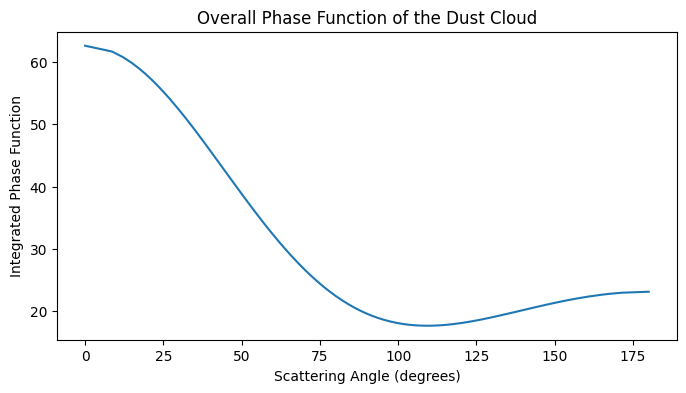

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import miepython

# Parameters and size distribution setup
m_particle = 1.56 + 0.003j
wavelength = 0.628
mode_radius = 0.1
std_dev = 0.05
shape = std_dev
mu = np.log(mode_radius) + shape**2
scale = np.exp(mu)
num_sizes = 100
radii = np.logspace(np.log10(0.05), np.log10(1.0), num_sizes)
pdf = lognorm.pdf(radii, shape, scale=scale)

# Preparing to calculate the overall phase function
num_angles = 180
angles_cosine = np.linspace(-1, 1, num_angles)
total_phase_function = np.zeros(num_angles)

# Compute scattering for each size and integrate the phase function
for i, radius in enumerate(radii):
    x = 2 * np.pi * radius / wavelength
    _, _, _, _ = miepython.mie(m_particle, x)
    s1, s2 = miepython.mie_S1_S2(m_particle, x, angles_cosine)
    phase_contrib = 0.5 * (np.abs(s1)**2 + np.abs(s2)**2) * pdf[i]
    total_phase_function += phase_contrib


# Plot the overall phase function for the dust cloud
plt.figure(figsize=(8, 4))
plt.plot(np.degrees(np.arccos(angles_cosine)), total_phase_function)
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Integrated Phase Function')
plt.title('Overall Phase Function of the Dust Cloud')
plt.show()

plt.show()


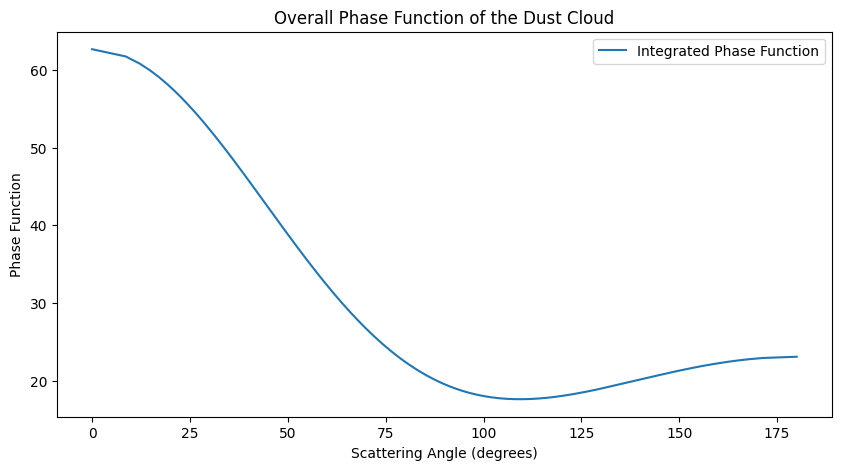

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import miepython

# Parameters and setup
m_particle = 1.56 + 0.003j
wavelength = 0.628
num_sizes = 100
radii = np.logspace(np.log10(0.05), np.log10(1), num_sizes)
shape = std_dev
mu = np.log(mode_radius) + shape**2
scale = np.exp(mu)
pdf = lognorm.pdf(radii, shape, scale=scale)
num_angles = 180
angles_cosine = np.linspace(-1, 1, num_angles)
total_phase_function = np.zeros(num_angles)

# Compute and integrate phase function
for i, radius in enumerate(radii):
    x = 2 * np.pi * radius / wavelength
    s1, s2 = miepython.mie_S1_S2(m_particle, x, angles_cosine)
    phase_contrib = 0.5 * (np.abs(s1)**2 + np.abs(s2)**2) * pdf[i]
    total_phase_function += phase_contrib

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(np.degrees(np.arccos(angles_cosine)), total_phase_function, label='Integrated Phase Function')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Phase Function')
plt.title('Overall Phase Function of the Dust Cloud')
plt.legend()
plt.show()


In [15]:
pip install radmc3d

ERROR: Could not find a version that satisfies the requirement radmc3d (from versions: none)
ERROR: No matching distribution found for radmc3d
Note: you may need to restart the kernel to use updated packages.


In [16]:
import radmc3d

ModuleNotFoundError: No module named 'radmc3d'